# 目次

- 概要把握  
- 欠損値の確認  
- 重複行の確認  
- ペアワイズ削除法  
- リストワイズ削除法  
- 平均値代入法  

# ライブラリ群

In [1]:
print("データ処理系")
import csv
import numpy as np
import pandas as pd

print("描画系")
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib import rcParams
import japanize_matplotlib
mplstyle.use('fast')
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style(style='dark')

print("表示調整系")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.0f}'.format
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["font.size"] = 10
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))

データ処理系
描画系
表示調整系


In [2]:
print('データ取得')
user_table = pd.read_csv("./user_table.csv")
tran_AtoI = pd.read_csv("./historical_transactions_AtoI.csv")
tran_X = pd.read_csv("./historical_transactions_X.csv")

データ取得


# 概要把握

In [3]:
print('レコード件数比較用の関数')
def show_graph(labels, records, color, va):
    graph = plt.bar(labels, records, color=color)

    def autolabel(graph):
        for rect in graph:
            labels = rect.get_height()
            plt.annotate('{}'.format(labels),
                xy=(rect.get_x() + rect.get_width() / 2, labels),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va=va)

    plt.grid()
    autolabel(graph);

レコード件数比較用の関数


レコード件数をプロット


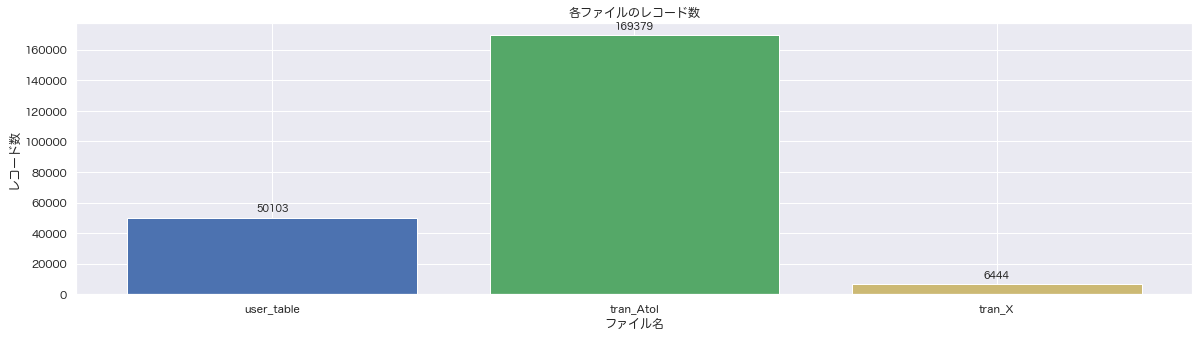

In [4]:
print('レコード件数をプロット')
x1=len(user_table)
x2=len(tran_AtoI)
x3=len(tran_X)
records=[x1,x2,x3]
labels=['user_table','tran_AtoI','tran_X']
color=['b','g','y']
va='bottom'

plt.title('各ファイルのレコード数')
plt.xlabel('ファイル名')
plt.ylabel('レコード数')
show_graph(labels, records, color, va);

In [5]:
user_table.head()
tran_AtoI.head()
tran_X.head()

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,14742,Richard Chen,kathryn77,20,NaN,1,0,Human resources officer,394,Last sit star physical accept. Actually relate...
1,21530,Kayla Garcia,brandtalexander,59,Saint Kitts and Nevis,4,0,"Teacher, early years/pre",370,Door entire as. Whose suddenly mission hold.\n...
2,34985,Troy Blackwell,richardfarmer,44,Iraq,3,2,Forensic psychologist,326,Writer drug a tax. Team standard both write pr...
3,31854,Suzanne Ray,nicole40,52,Sri Lanka,nan,0,Garment/textile technologist,673,Evidence try next degree man local. Movie sea ...
4,46689,Susan Horn,heather38,nan,Japan,1,0,Nature conservation officer,306,Voice after assume hard tonight. Recent try ma...


,user_id,price,num_purchase,item
0,0,867,3,C
1,0,947,2,F
2,0,815,2,D
3,0,867,3,C
4,1,172,2,B


,user_id,price,num_purchase,item
0,1,137,1,X
1,7,137,1,X
2,9,137,1,X
3,19,137,1,X
4,21,137,1,X


# 欠損値の確認

In [6]:
missing_user_table = pd.DataFrame()
# user_table
for column in user_table.columns:
    missing_user_table[column] = [user_table[user_table[column].isnull()].shape[0]]

# historical_transactions_AtoI
missing_tran_AtoI = pd.DataFrame()
for column in tran_AtoI.columns:
    missing_tran_AtoI[column] = [tran_AtoI[tran_AtoI[column].isnull()].shape[0]]

# historical_transactions_X
missing_tran_X = pd.DataFrame()
for column in tran_X.columns:
    missing_tran_X[column] = [tran_X[tran_X[column].isnull()].shape[0]]

missing_user_table
missing_tran_AtoI
missing_tran_X

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,0,0,0,5131,10148,2570,2456,0,2527,0


,user_id,price,num_purchase,item
0,0,0,0,0


,user_id,price,num_purchase,item
0,0,0,0,0


# 重複行の確認

In [7]:
duplicated_check = pd.DataFrame()
duplicated_check["ユーザー"] = [user_table[user_table.duplicated()].shape[0]]
duplicated_check["購入履歴１"] = [tran_AtoI[tran_AtoI.duplicated()].shape[0]]
duplicated_check["購入履歴２"] = [tran_X[tran_X.duplicated()].shape[0]]
duplicated_check

,ユーザー,購入履歴１,購入履歴２
0,103,17179,826


# ペアワイズ削除法

In [8]:
user_table_drop = user_table.copy()
user_table_drop = user_table.dropna()

df = pd.DataFrame()
df['項目名'] = user_table.columns
rows = []
rows_drop = []
for column in user_table.columns:
    rows.append(user_table[column].count())
    rows_drop.append(user_table_drop[column].count())

df['削除前件数'] = rows
df['削除後件数'] = rows_drop

df

,項目名,削除前件数,削除後件数
0,user_id,50103,30714
1,name,50103,30714
2,nickname,50103,30714
3,age,44972,30714
4,country,39955,30714
5,num_family,47533,30714
6,married,47647,30714
7,job,50103,30714
8,income,47576,30714
9,profile,50103,30714


# リストワイズ削除法

In [9]:
# ペアワイズ削除法
# 欠損値の多い列を削除
drop_df = user_table.drop(columns=['age', 'country'])
# リストワイズ削除法
user_table_drop = drop_df.copy()
user_table_drop = drop_df.dropna()

df = pd.DataFrame()
df['項目名'] = drop_df.columns
rows = []
rows_drop = []
for column in drop_df.columns:
    rows.append(drop_df[column].count())
    rows_drop.append(user_table_drop[column].count())

df['削除前件数'] = rows
df['削除後件数'] = rows_drop

df

,項目名,削除前件数,削除後件数
0,user_id,50103,42940
1,name,50103,42940
2,nickname,50103,42940
3,num_family,47533,42940
4,married,47647,42940
5,job,50103,42940
6,income,47576,42940
7,profile,50103,42940


# 平均値代入法

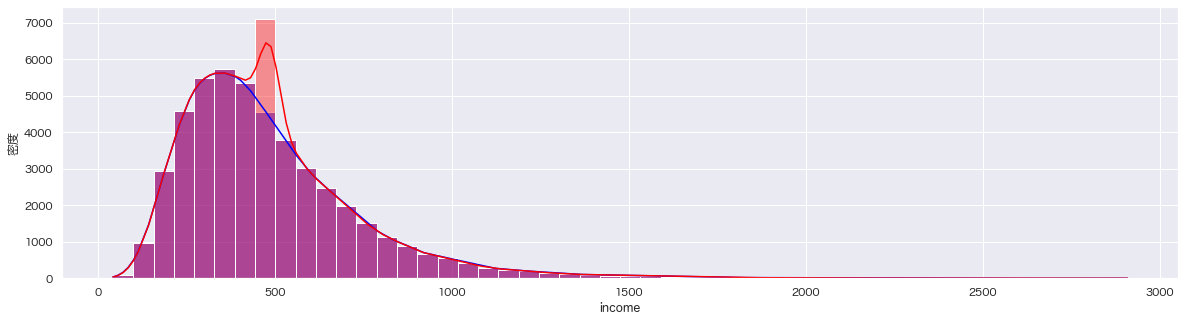

In [32]:
fig,ax=plt.subplots(figsize = (20 , 5))
ax.set_ylabel('密度')
plt.grid()

# 代入前
sns.histplot(user_table['income'], label='before', kde=True, bins=50, color='blue')

# 平均値代入法
user_table_fillna = user_table.copy()
user_table_fillna['income'] = user_table['income'].fillna(user_table['income'].mean())

# 代入後
sns.histplot(user_table_fillna['income'], label='after', kde=True, bins=50, color='red', alpha=0.4);

In [11]:
# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder

user_table['country'].value_counts()

le = LabelEncoder()
user_table_label = user_table.copy()
# 欠損値の補完
user_table_label['country'] = user_table_label['country'].fillna('0')
user_table_label['country'] = le.fit_transform(user_table_label['country'])
user_table_label['country'].value_counts().sort_index(ascending=False)

Egypt                    8099
Japan                    8087
Saint Kitts and Nevis    7977
Sri Lanka                7955
Iraq                     7837
Name: country, dtype: int64

5     7955
4     7977
3     8087
2     7837
1     8099
0    10148
Name: country, dtype: int64